In [2]:
%matplotlib inline

from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (7,7)

In [4]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


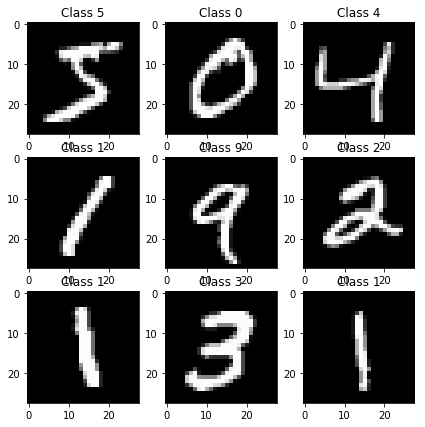

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [6]:
# reshape so each 28x28 image becomes a single 784 dimensional vector
# also scale inputs to be [0-1] rather than [0-255]

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
# one-hot target labels

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
# build the NN

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))    
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [9]:
# compile model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# train model

model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=4,
    verbose=1,
    validation_data=(X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 16s - loss: 0.2487 - acc: 0.9248 - val_loss: 0.1023 - val_acc: 0.9693
Epoch 2/4
60000/60000 [==============================] - 15s - loss: 0.1017 - acc: 0.9688 - val_loss: 0.0725 - val_acc: 0.9767
Epoch 3/4
60000/60000 [==============================] - 13s - loss: 0.0699 - acc: 0.9780 - val_loss: 0.0721 - val_acc: 0.9779
Epoch 4/4
60000/60000 [==============================] - 14s - loss: 0.0563 - acc: 0.9819 - val_loss: 0.0590 - val_acc: 0.9822


In [16]:
# evaluate performance

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('loss:', score)
print('accuracy:', accuracy)

loss: 0.0590397151056
accuracy: 0.9822


In [22]:
# inspect output

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

 9888/10000 [============================>.] - ETA: 0s

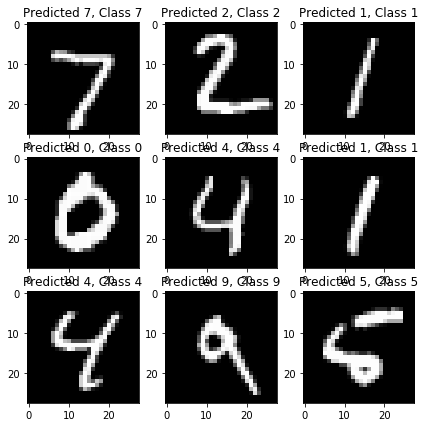

In [21]:
# classified correctly

correct_indices = np.nonzero(predicted_classes == y_test)[0]

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

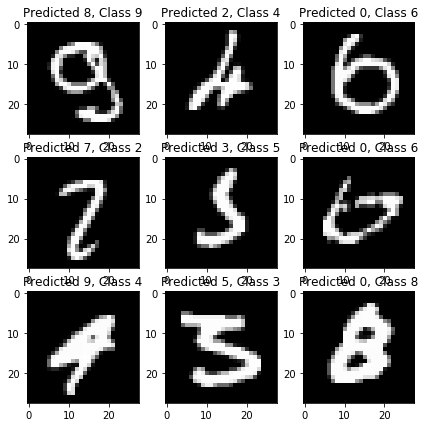

In [23]:
# classified incorrectly

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))